# Using RandomForest Classication To Predict Most Important Variables Associated with Diabetes

## Business Understanding

**Objective:**
* Build a machine learning model to classify diabetes presence (1) or absence (0) based on available health-related features.
* Provide insights into key risk factors and predictive performance of different models.

**Key Questions to Answer:**
* How well can we predict diabetes based on available features?
* What factors contribute to diabetes classification?

## Preparing the Environment

Importing the required libraries to read in the diabetes dataset

* Pandas - For Data Manipulation
* Numpy - For Data Arrays



In [228]:
#libraries needed for Exploratory Data Analysis
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    ConfusionMatrixDisplay
)


In [46]:
# Reading in the Dataset in CSV format
dia = pd.read_csv('/Users/Seb/Documents/Udacity Project 1/diabetes.csv')

# Exploratory Data Analysis
In this Section We:
* Explore Data Overview
* Perform Data Quality Checks
  

#### Explore Data Overview

In [67]:
# Exploring the data overview with df.info, df.head and df.describe
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**From this Initial EDA we understand that our dataset has:**
* Loaded in correctly
* 768 entries
* 8 Independant Variables
* 1 Dependant Variables (Outcome)
* Has expected data distribution within each feature

#### Perform Data Quality Checks

**In this section we examine our data for:**
* Completeness (missing data)
* Duplication
* Anomalous Results


In [122]:
# Examining for missing values (Note: 0 NA values found)
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
# Examining for Duplicated Results
dia.duplicated().sum()

0

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

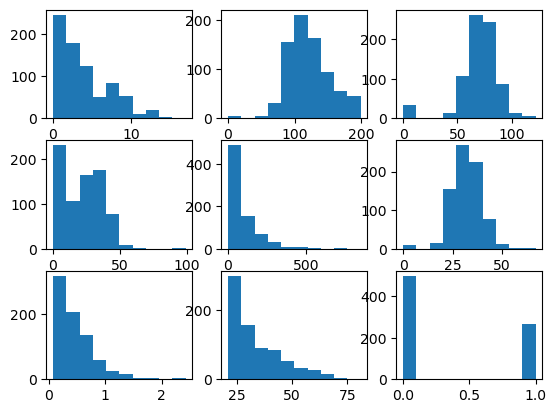

In [166]:
# Visualising Each Varible to understand Data Distribution for outliers in data points
plt.subplot(3,3,1)
plt.hist(dia['Pregnancies'])
plt.subplot(3,3,2)
plt.hist(dia['Glucose'])
plt.subplot(3,3,3)
plt.hist(dia['BloodPressure'])
plt.subplot(3,3,4)
plt.hist(dia['SkinThickness'])
plt.subplot(3,3,5)
plt.hist(dia['Insulin'])
plt.subplot(3,3,6)
plt.hist(dia['BMI'])
plt.subplot(3,3,7)
plt.hist(dia['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
plt.hist(dia['Age'])
plt.subplot(3,3,9)
plt.hist(dia['Outcome'])


# A Machine Random Forest Learning Method
**A RandomForest Approach is best suited here for a variety of reasons including:**
* A Reduction in Over-fitting
* The Understanding of interacitons among features
* It is good a dealing with an imbalance in data (K-fold Cross-Validation)

## Splitting the Data
* Dataset for Independant (X)
* Dataset just of Dependant (Y)
* Training Data (80%)
* Test Data (20%)

In [189]:
# Splitting the data into independance (X) and Dependant (Y) using .drop()
X = dia.drop('Outcome', axis = 1)
Y = dia['Outcome']

#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

## Our Random Forest Model
* Fitting the RF Model
* Assessing the Accuracy of our Model
* Tuning our Model
* Re-Assessing Accuracy

In [198]:
# Fitting the RF Model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [206]:
# Assessing the accuracy of the model on the 20% unseen data
Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7467532467532467


Our First Model Shows Accuracy of 0.75 **_without hyperparameter tuning_**. This means that the model is correctly predicting both the positive and negative cases at a 75% accuracy

## Tuning Our RF Model
**Here we aim to tune:**
* Number of Trees (n_estimators)
* Depth of each tree (max_depth)
* Minimum Sample Split (min_samples_split)
* Minimum Samples per leaf (min_samples_leaf)
* Implement K-Fold Cross Validation

In [224]:
# Re-Initialise Our 75% Accurate Random Forest Classifier
rf2 = RandomForestClassifier()
rf2.fit(X_train, Y_train)

RandomForestClassifier()

In [238]:
# The Tuning Parameters we are interested in:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}
# Using Stratified K-folds for equal class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True)
# Systematically testing combinations of hyperparameters with grid_search
grid_search = GridSearchCV(rf2, param_grid, cv = skf, scoring = 'f1')
grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [248]:
#Looking at the most optimal hyper-paramter tuning
best_rf_para = grid_search.best_estimator_
# Identifying what those hyperparameters are
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [256]:
# Training the most optimised classification model for final evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)
best_rf_para.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

## Evaluating our Tuned Hyper-parameter model

In [258]:
# Assessing the accuracy of the model on the 20% unseen data on our tuned RF model
Y_pred = best_rf_para.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7857142857142857


**Through our hyper-parameter tuning we have increased the accuracy of our model to 79%**

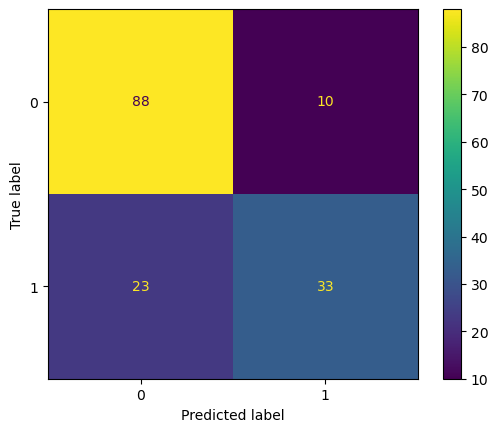

In [267]:
# Evaluating the Confusion Matrix of Our Model
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

**The Confusion Matrx shows:**
* 33 True Postives and 88 True Negatives for people with and without diabetes respectivally
* Our model has high false negatives (23) indicating potential issues in recall for the diabetic class

In [273]:
# Evaluating our Recall Score i.e how well the model identifies actual positives
recall = recall_score(Y_test, Y_pred)
print(recall)

0.5892857142857143


**The Recall Metric shows:**

Our model shows a recall of 59% (alittle on the lower side) indicating we are identifying 59% of positive diabetes cases. This indicates our model could be suffering from class imbalance

## Imagining A New Scenario for the RF Model
**In this New Scenario:** 
* A healthcare professional has a new patient and wants to know the likelyhood that they have diabetes or not. 
* They also want to advice the patient where to focus there effort to reduce the risk of developing diabetes in the future


In [300]:
variable_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create a DataFrame for the new patient
new_patient = pd.DataFrame([[2, 150, 80, 20, 85, 30.0, 0.6, 45]], columns=feature_names)

In [304]:
#Predicting the likelyhood of diabetes
prediction = best_rf_para.predict(new_patient)
print(prediction)

[1]


**The model predicts the patient is likely to have diabetes. A doctor might use this result as a signal to conduct further medical tests.**

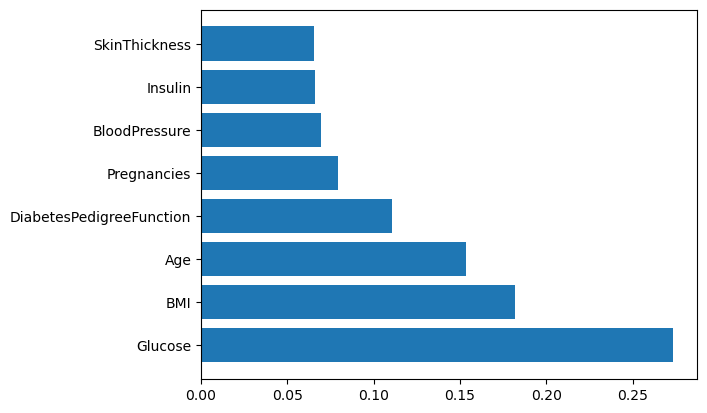

In [326]:
#Assessing the variable importance of our variables in predicting the pressence of diabetes
variable_importance = best_rf_para.feature_importances_
#Creating dataframe for visualisation
variable_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
importance_df = pd.DataFrame({"Variable": variable_names, "Importance": variable_importance})
# Sort features by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)
#Plotting the 
plt.barh(importance_df["Variable"], importance_df["Importance"])
plt.show()

Through understanding the most helpful indicators of diabetes a doctor can advise more effective change to a patient to create more meaningful outcomes. In this scenario our model predicts **glucose** as the variable with the most importance in tackling/predicting diabetes. As such doctors can prescribe/advice based on this factor intially in helping the patient prevent diabetes in the future.